<a href="https://colab.research.google.com/github/GabyPaolaING/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

##1. Fundamentos de la técnica

La Regresión Logística es un modelo estadístico utilizado para clasificar datos en dos clases (0 o 1).
A diferencia de la regresión lineal, que predice valores continuos, la regresión logística predice probabilidades.

¿Cómo funciona?

1.   El modelo combina las variables de entrada (features) en una ecuación lineal.
2.   Esa suma se pasa por una función llamada sigmoide, que convierte cualquier número en un valor entre 0 y 1.
3. Si la probabilidad es ≥ 0.5 → clase 1
4. Si la probabilidad es < 0.5 → clase 0


## 2. Modelo Matemático de la técnica

 2.1 Función lineal

$$
z = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n
$$


 2.2 Función Sigmoide

La probabilidad se obtiene aplicando la función sigmoide:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


 2.3 Predicción final

 $$
\hat{y} =
\begin{cases}
1 & \text{si } \sigma(z) \ge 0.5 \\
0 & \text{si } \sigma(z) < 0.5
\end{cases}
$$



2.4 Entrenamiento

El modelo ajusta los parámetros usando Maximum Likelihood y Descenso del Gradiente, minimizando la función de pérdida (Log-Loss):



$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

## 3. Descripción de las librerías y funciones

Usaremos:


**pandas**


Para cargar y manipular datos.
Funciones importantes:

read_csv(): leer archivos csv

head(), describe(): análisis rápido


**numpy**


Operaciones numéricas.


**matplotlib.pyplot**

Para gráficos:

scatter(): gráfico de dispersión

plot(): líneas


**klearn.model_selection**


train_test_split(): separa datos en entrenamiento y prueba.


**sklearn.preprocessing**


StandardScaler: normaliza los datos.


**sklearn.linear_model**


LogisticRegression: modelo principal.


**sklearn.metrics**


confusion_matrix(): matriz de confusión

accuracy_score(): exactitud


## 4. Pipeline

### 4.1 Preprocesamiento

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###Statistical Analysis

In [3]:
X.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###Scatter Plot

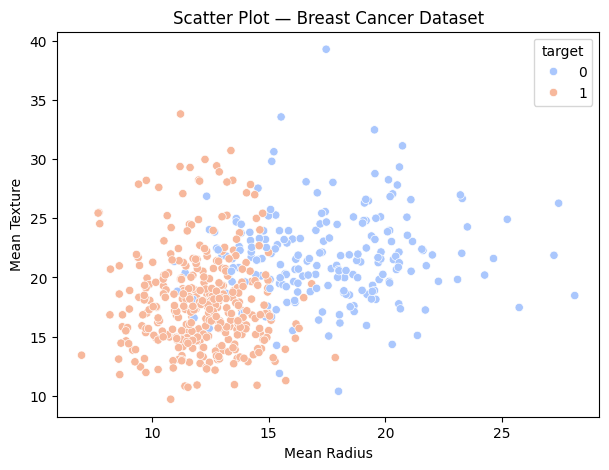

In [4]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X["mean radius"],
    y=X["mean texture"],
    hue=y,
    palette="coolwarm"
)
plt.title("Scatter Plot — Breast Cancer Dataset")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.show()


###Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X)


###4.2 Feature Engineering

###Feature Selection

In [7]:
selected_features = ["mean radius", "mean texture", "mean smoothness"]
X_selected = X[selected_features]


###Scaling Selected Features

In [8]:
X_scaled = scaler.fit_transform(X_selected)


###Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


###4.3 Prediction

###Model Training

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

###Prediction Function

In [12]:
def predict_class(new_pattern):
    """
    new_pattern format:
    [mean_radius, mean_texture, mean_smoothness]
    """
    import pandas as pd

    df = pd.DataFrame([new_pattern], columns=["mean radius", "mean texture", "mean smoothness"])
    new_scaled = scaler.transform(df)

    pred = model.predict(new_scaled)[0]
    classes = {0: "Malignant", 1: "Benign"}
    return classes[pred]

# Example
predict_class([14.0, 23.0, 0.1])


'Malignant'

###4.4 Model Evaluation

###Matriz de Confusión.


Una matriz de confusión incluye los siguientes elementos:

-True Positives (TP) / Verdaderos Positivos:
El modelo predice benigno y realmente es benigno.

-True Negatives (TN) / Verdaderos Negativos:
El modelo predice maligno y realmente es maligno.

-False Positives (FP) / Falsos Positivos:
El modelo predice benigno, pero en realidad es maligno.
(También conocido como error tipo I).

-False Negatives (FN) / Falsos Negativos:
El modelo predice maligno, pero en realidad es benigno.
(También llamado error tipo II).

La matriz de confusión permite evaluar los tipos de errores que comete el clasificador y comprender mejor su desempeño.

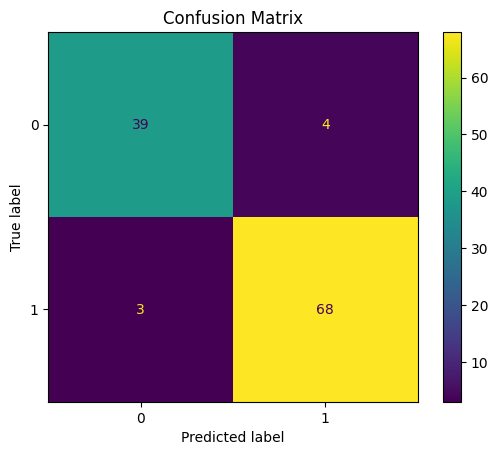

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


###Accuracy (Exactitud)

La Accuracy o Exactitud se calcula como la proporción de predicciones correctas realizadas por el modelo. Su fórmula es:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$





Donde:

-TP = Verdaderos Positivos

-TN = Verdaderos Negativos

-FP = Falsos Positivos

-FN = Falsos Negativos

La exactitud representa la proporción total de predicciones correctas que realiza el modelo sobre todas las muestras evaluadas.

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9385964912280702

###2.  Referencias bibliográficas (APA 7)


1. Géron, A. (2019). Hands-On
Machine Learning with Scikit-Learn, Keras & TensorFlow. O’Reilly Media.

2. Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

3. Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. Springer.

4. University of Wisconsin Hospitals. (1995). Breast Cancer Wisconsin Dataset. UCI Machine Learning Repository.




Gabriela Paola Castañeda Baltazar